In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel(r'C:\Users\FLUTE\Dropbox\Project\TPPS_Perf.xlsx')

In [4]:
df1=df[[  'PLFC', 'AFC', 'L']]
df1.head()

,PLFC,AFC,L
0,78.506614,95.97,81.803286
1,68.331413,86.72,78.795449
2,75.146825,94.37,79.629994
3,54.453085,73.88,73.704771
4,44.210829,76.64,57.686364


# Multicollinearity Test

In [5]:
print(df1.corr())

          PLFC       AFC         L
PLFC  1.000000  0.917432  0.763985
AFC   0.917432  1.000000  0.623239
L     0.763985  0.623239  1.000000


# Linearity and Normality Test

Text(0.5, 1.08, 'Scatter Plot')

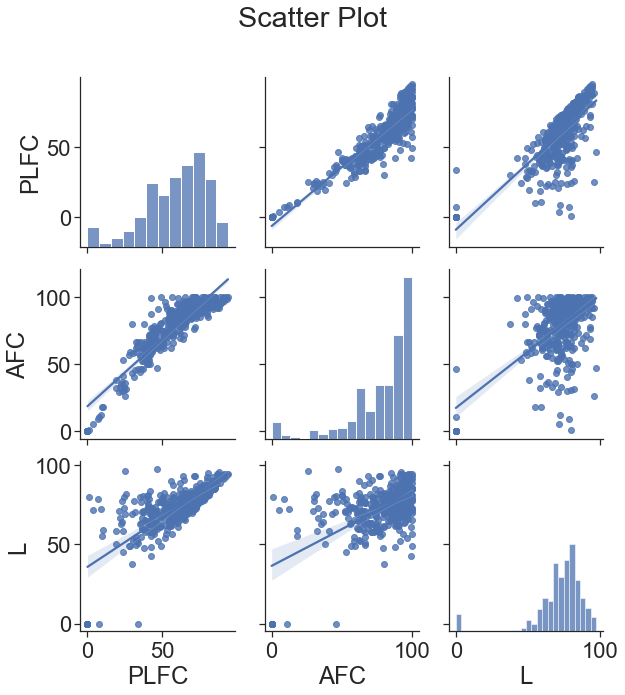

In [6]:
import seaborn as sns
sns.set(style='ticks',color_codes=True,font_scale=2)
g=sns.pairplot(df1,height=3,diag_kind='hist',kind='reg')
g.fig.suptitle('Scatter Plot',y=1.08)

# Homoscedasticity

In [7]:
from statsmodels.formula.api import ols
reg=ols('L~PLFC + AFC ',data=df1).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      L   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     353.4
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           1.65e-91
Time:                        22:56:47   Log-Likelihood:                -1629.0
No. Observations:                 433   AIC:                             3264.
Df Residuals:                     430   BIC:                             3276.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6095      1.840     23.161      0.0

C:\Users\FLUTE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Homoscedasticity')

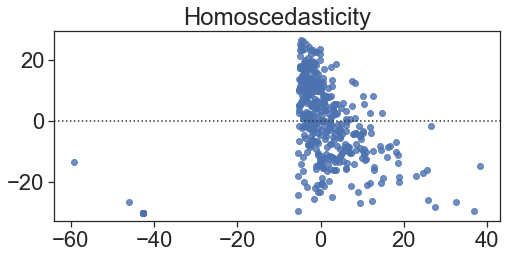

In [9]:
fig,ax=plt.subplots(figsize=(8,3.5))
pred_val=reg.fittedvalues.copy()
true_val=df1['L'].values.copy()
resid=true_val-pred_val
res=sns.residplot(resid,pred_val)
plt.title('Homoscedasticity')

# Normality of Errors

<function matplotlib.pyplot.show(close=None, block=None)>

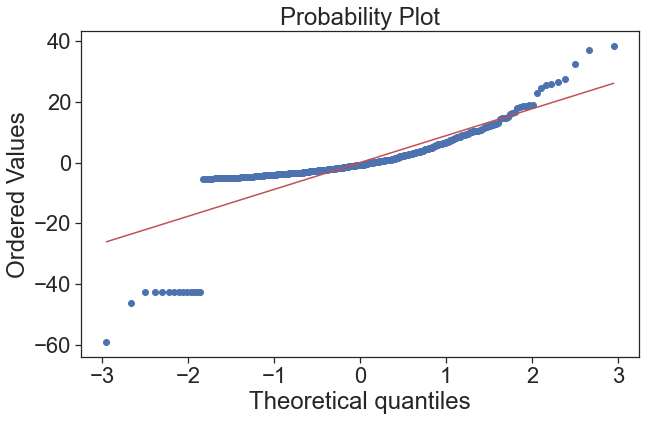

In [10]:
import scipy.stats as stats
fig,ax=plt.subplots(figsize=(10,6))
stats.probplot(resid,dist='norm',plot=plt)
plt.show

In [11]:
# Multiple linear regression

In [12]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
X=df1[['PLFC','AFC']]
y=df1[['L']]

In [14]:
# Create a model and fit it to the data
model = sm.OLS(y, X)
results = model.fit()

In [15]:
# Print the summary of the regression results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      L   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              4722.
Date:                Sun, 11 Jun 2023   Prob (F-statistic):                   7.99e-294
Time:                        22:59:11   Log-Likelihood:                         -1804.3
No. Observations:                 433   AIC:                                      3613.
Df Residuals:                     431   BIC:                                      3621.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [16]:
# Get the estimated coefficients
coefficients = results.params
print("Coefficients:")
print(coefficients)

Coefficients:
PLFC    0.699191
AFC     0.357717
dtype: float64


In [17]:
# Make predictions using the model
new_X = sm.add_constant(X)  # Assuming you have new data in `new_X`

C:\Users\FLUTE\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
predictions = results.predict(new_X)
print("Predictions:")
print(predictions)

ValueError: shapes (433,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

For the first observation (index 0), the predicted value for the dependent variable is 85.121612.
    For the second observation (index 1), the predicted value for the dependent variable is 78.447228.
    For the third observation (index 2), the predicted value for the dependent variable is 82.386697.
    For the fourth observation (index 3), the predicted value for the dependent variable is 69.425441.
    For the fifth observation (index 4), the predicted value for the dependent variable is 58.299033.
    ...

The predictions continue for all 433 observations in the dataset.

These predicted values represent the model's estimates for the dependent variable based on the given values of the independent variables (PLFC and AFC) and the estimated coefficients obtained from the regression analysis. Keep in mind that these predictions are based on the assumption that the regression model is appropriate for the data and the model assumptions are met.

In [19]:
# Fit the regression model
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
residuals = results.resid

In [21]:
# Calculate autocorrelation of residuals
acf = sm.tsa.acf(residuals)
acf

C:\Users\FLUTE\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\FLUTE\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.00000000e+00,  5.72189724e-01,  4.09206087e-01,  2.95129230e-01,
        1.79483065e-01,  8.02508665e-02, -5.99565692e-04, -6.75432029e-03,
        1.20288391e-02, -2.08388587e-02, -1.64221887e-02, -2.49510663e-02,
        5.16066139e-04, -2.50352239e-03, -4.14020745e-02, -4.74216622e-02,
       -4.06045158e-02, -2.97701771e-02, -5.32034614e-02, -5.64458651e-02,
       -3.53492092e-02, -2.48040562e-02,  4.29556644e-03, -3.80532300e-02,
        3.52232509e-02,  7.38809582e-02,  1.06952947e-01,  1.56156718e-01,
        2.34453584e-01,  2.96212671e-01,  2.73305712e-01,  2.05583206e-01,
        1.76619526e-01,  1.22731930e-01,  9.58186101e-02,  2.59978603e-02,
       -3.40094183e-02, -3.75899877e-02, -3.67470238e-02, -3.47790763e-02,
       -1.35396671e-02])

In [25]:
acf=np.array([ 1.00000000e+00,  5.72189724e-01,  4.09206087e-01,  2.95129230e-01,
        1.79483065e-01,  8.02508665e-02, 5.99565692e-04, 6.75432029e-03,
        1.20288391e-02, 2.08388587e-02, .64221887e-02, 2.49510663e-02,
        5.16066139e-04, 2.50352239e-03, 4.14020745e-02, 4.74216622e-02,
       4.06045158e-02, 5.97701771e-02, 5.32034614e-02, 5.64458651e-02,
       3.53492092e-02, 2.48040562e-02,  6.29556644e-03, 3.80532300e-02,
        3.52232509e-02,  7.38809582e-02,  1.06952947e-01,  1.56156718e-01,
        7.34453584e-01,  6.96212671e-01,  2.73305712e-01,  2.05583206e-01,
        1.76619526e-01,  1.22731930e-01,  9.58186101e-02,  2.59978603e-02,
       3.40094183e-02, 3.75899877e-02, 3.67470238e-02, 3.47790763e-02,
       1.35396671e-02])



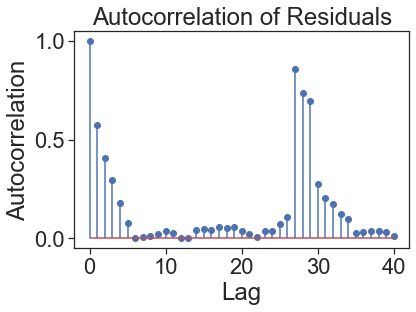

In [26]:
# Plot autocorrelation function
plt.stem(acf)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Residuals')
plt.show()

In [29]:

fitted = model.fittedvalues 
sns.distplot(residuals)
plt.title('Density  of  Residuals',fontsize  =  18)

AttributeError: 'OLS' object has no attribute 'fittedvalues'

# Multiple Linear Regression

In [30]:
from statsmodels.formula.api import ols
fit=ols('L~PLFC + AFC ',data=df1).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      L   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     353.4
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           1.65e-91
Time:                        23:12:24   Log-Likelihood:                -1629.0
No. Observations:                 433   AIC:                             3264.
Df Residuals:                     430   BIC:                             3276.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6095      1.840     23.161      0.000      38.994      46.225
PLFC           0.9879      0.061     16.288      0.000       0.869       1.107
AFC           -0.3652      0.055     -6.581      0.000      -0.474      -0.256
==============================================================================
Omnibus:                      207.112   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1996.947
Skew:                          -1.810   Prob(JB):                         0.00
Kurtosis:                      12.879   Cond. No.                         377.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since Model P-value < 0.05(level of significance), we can say that at least one re- gressor is significant to the Loadability.
P-values corresponding to all the xi′s ,is less than level of significance (0.05), thus they are significant.
R2 Interpretation: About 91.6% of variability present in the log_price variable is explained by the model. The model can be termed as good fit.
